# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

In [61]:
previsao_de_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [72]:
previsao_de_renda_para_correlacao = previsao_de_renda[['educacao', 'tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos', 'idade', 'renda']]

In [73]:
previsao_de_renda_para_correlacao.head()

,educacao,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda
0,Secundário,6.602740,1.0,0,26,8060.34
1,Superior completo,7.183562,2.0,0,28,1852.15
2,Superior completo,0.838356,2.0,0,35,2253.89
3,Superior completo,4.846575,3.0,1,30,6600.77
4,Secundário,4.293151,1.0,0,33,6475.97


In [74]:
previsao_de_renda_para_correlacao.corr()

,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda
tempo_emprego,1.000000,-0.065670,-0.063220,0.321573,0.385013
qt_pessoas_residencia,-0.065670,1.000000,0.889777,-0.339320,0.047842
qtd_filhos,-0.063220,0.889777,1.000000,-0.360426,0.029346
idade,0.321573,-0.339320,-0.360426,1.000000,0.022435
renda,0.385013,0.047842,0.029346,0.022435,1.000000


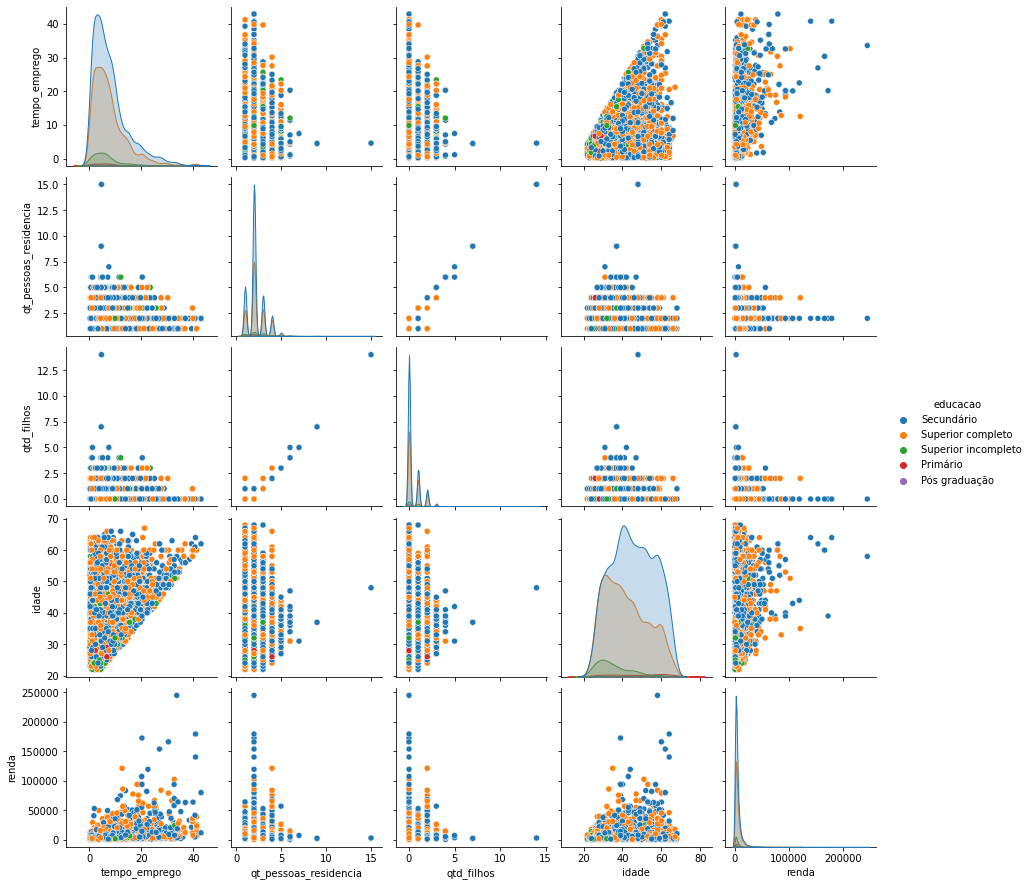

In [75]:
sns.pairplot(previsao_de_renda_para_correlacao, hue='educacao')

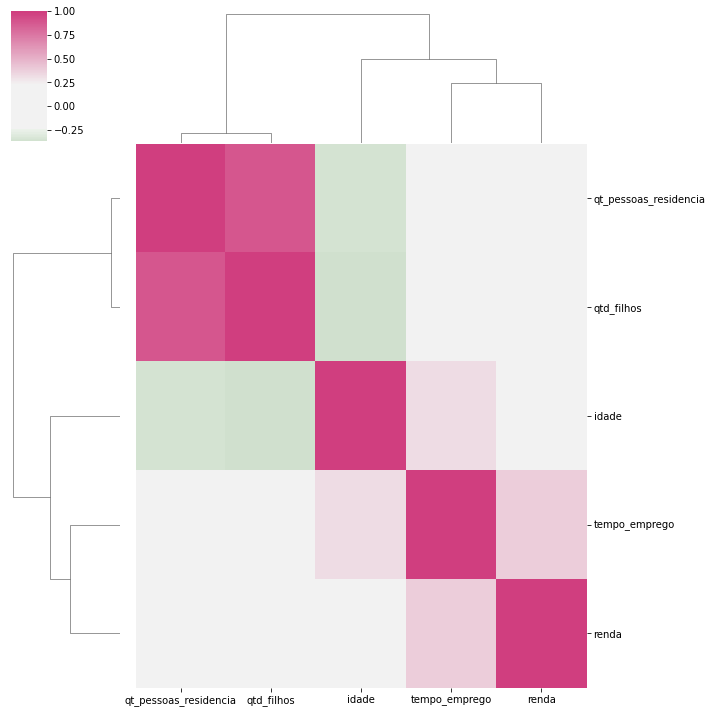

In [89]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_de_renda_para_correlacao.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda
tempo_emprego,1.000000,-0.065670,-0.063220,0.321573,0.385013
qt_pessoas_residencia,-0.065670,1.000000,0.889777,-0.339320,0.047842
qtd_filhos,-0.063220,0.889777,1.000000,-0.360426,0.029346
idade,0.321573,-0.339320,-0.360426,1.000000,0.022435
renda,0.385013,0.047842,0.029346,0.022435,1.000000


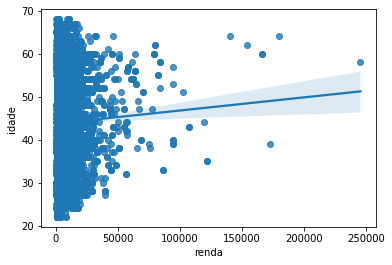

In [91]:
_ = sns.regplot(x= 'renda', y='idade', data= previsao_de_renda_para_correlacao)
previsao_de_renda_para_correlacao.corr()

,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda
tempo_emprego,1.000000,-0.065670,-0.063220,0.321573,0.385013
qt_pessoas_residencia,-0.065670,1.000000,0.889777,-0.339320,0.047842
qtd_filhos,-0.063220,0.889777,1.000000,-0.360426,0.029346
idade,0.321573,-0.339320,-0.360426,1.000000,0.022435
renda,0.385013,0.047842,0.029346,0.022435,1.000000


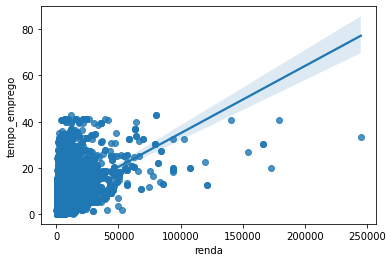

In [77]:
_ = sns.regplot(x= 'renda', y='tempo_emprego', data= previsao_de_renda_para_correlacao)
previsao_de_renda_para_correlacao.corr()

Primeiro separamos na base 'previsao_de_renda_para_correlacao' dados quantitavos. Joguei todos no scatterplot e temos os que mais mostram algo seriam 'idade' com uma correlação baixa e 'tempo de emprego' este com uma correlação melhor.

Para melhorar o entendimento das correlações vamos tentar usar o rank e entender se a visualização melhora. 

In [78]:
previsao_de_renda_para_correlacao_rank = pd.concat([previsao_de_renda_para_correlacao, previsao_de_renda_para_correlacao.rank()], axis = 1)

In [79]:
previsao_de_renda_para_correlacao_rank.head()

,educacao,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda,educacao,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda
0,Secundário,6.602740,1.0,0,26,8060.34,4639.0,6760.5,1376.5,5188.5,362.0,12332.0
1,Superior completo,7.183562,2.0,0,28,1852.15,11754.0,7286.0,6843.0,5188.5,1091.5,3269.0
2,Superior completo,0.838356,2.0,0,35,2253.89,11754.0,760.0,6843.0,5188.5,3994.5,4369.0
3,Superior completo,4.846575,3.0,1,30,6600.77,11754.0,5162.5,12209.0,11895.0,1888.0,11412.0
4,Secundário,4.293151,1.0,0,33,6475.97,4639.0,4514.0,1376.5,5188.5,3181.0,11304.5


In [81]:
previsao_de_renda_para_correlacao_rank.columns = ['educacao','tempo_emprego',	'qt_pessoas_residencia',	'qtd_filhos',	'idade',	'renda',	
                                                  'educacao_rank',	'tempo_emprego_rank',	'qt_pessoas_residencia_rank',	'qtd_filhos_rank',	'idade_rank',	'renda_rank']

In [82]:
previsao_de_renda_para_correlacao_rank.head()

,educacao,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda,educacao_rank,tempo_emprego_rank,qt_pessoas_residencia_rank,qtd_filhos_rank,idade_rank,renda_rank
0,Secundário,6.602740,1.0,0,26,8060.34,4639.0,6760.5,1376.5,5188.5,362.0,12332.0
1,Superior completo,7.183562,2.0,0,28,1852.15,11754.0,7286.0,6843.0,5188.5,1091.5,3269.0
2,Superior completo,0.838356,2.0,0,35,2253.89,11754.0,760.0,6843.0,5188.5,3994.5,4369.0
3,Superior completo,4.846575,3.0,1,30,6600.77,11754.0,5162.5,12209.0,11895.0,1888.0,11412.0
4,Secundário,4.293151,1.0,0,33,6475.97,4639.0,4514.0,1376.5,5188.5,3181.0,11304.5


,tempo_emprego,qt_pessoas_residencia,qtd_filhos,idade,renda,educacao_rank,tempo_emprego_rank,qt_pessoas_residencia_rank,qtd_filhos_rank,idade_rank,renda_rank
tempo_emprego,1.000000,-0.065670,-0.063220,0.321573,0.385013,-0.028426,0.887722,-0.073863,-0.076565,0.321263,0.378389
qt_pessoas_residencia,-0.065670,1.000000,0.889777,-0.339320,0.047842,0.048871,-0.019284,0.954716,0.833226,-0.337845,0.066625
qtd_filhos,-0.063220,0.889777,1.000000,-0.360426,0.029346,0.065673,-0.028471,0.780288,0.930712,-0.360892,0.048606
idade,0.321573,-0.339320,-0.360426,1.000000,0.022435,-0.196220,0.251525,-0.353003,-0.407158,0.997206,-0.008158
renda,0.385013,0.047842,0.029346,0.022435,1.000000,0.023958,0.316766,0.047895,0.025184,0.026703,0.599173
educacao_rank,-0.028426,0.048871,0.065673,-0.196220,0.023958,1.000000,-0.023002,0.053403,0.083316,-0.198911,0.051818
tempo_emprego_rank,0.887722,-0.019284,-0.028471,0.251525,0.316766,-0.023002,1.000000,-0.023666,-0.040291,0.252823,0.374330
qt_pessoas_residencia_rank,-0.073863,0.954716,0.780288,-0.353003,0.047895,0.053403,-0.023666,1.000000,0.823087,-0.350803,0.070031
qtd_filhos_rank,-0.076565,0.833226,0.930712,-0.407158,0.025184,0.083316,-0.040291,0.823087,1.000000,-0.407313,0.051217
idade_rank,0.321263,-0.337845,-0.360892,0.997206,0.026703,-0.198911,0.252823,-0.350803,-0.407313,1.000000,-0.002077


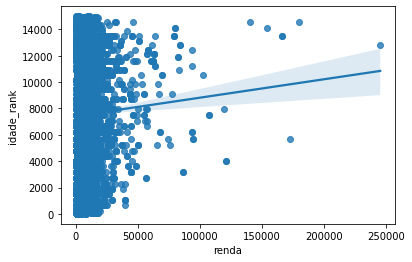

In [84]:
_ = sns.regplot(x= 'renda', y='idade_rank', data= previsao_de_renda_para_correlacao_rank)
previsao_de_renda_para_correlacao_rank.corr()

A visão por ranking não conseguiu entregar mais que a visão anterior.

Para 'tempo de emprego' a visualização ficou muito pior, então até tirei do estudo.

3) Na su aopinião, há outliers na variável renda?

Para 'idade' temos muitos outliers, pois não vemos com clareza uma relação de idade com renda. 

o cenário de tempo de emprego, mostra uma visão com um número de outliers menor.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

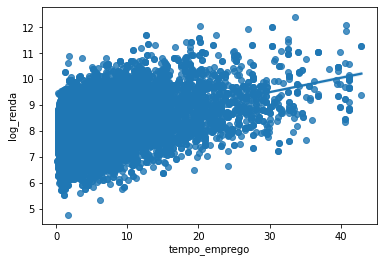

In [97]:
previsao_de_renda_para_correlacao_log = previsao_de_renda_para_correlacao.copy()
previsao_de_renda_para_correlacao_log['log_renda'] = np.log(previsao_de_renda_para_correlacao_log['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_renda', data = previsao_de_renda_para_correlacao_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou quando correlacionado ao 'tempo_emprego' pois ele dissipou a quantidade de salários. Então agora conseguimos ver que o tempo de emprego maior resulta em um 'log_renda' também maior. 